## Изучение рынка игр


#### Задача:
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Необходимо выявить определяющие успешность игры закономерности. 

#### Краткий план:
1. Откроем файл с данными и изучим общую информацию, определим пропуски и данные требующие подготовки.
2. Подготовка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверка гипотез

### Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/games.csv')

In [2]:
df.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4645,Blazing Angels: Squadrons of WWII,X360,2006.0,Simulation,0.36,0.02,0.00,0.03,66.0,7.9,T
10135,The Fairly Odd Parents: Breakin Da Rules,XB,2003.0,Platform,0.08,0.02,0.00,0.00,NaN,NaN,NaN
14826,Warship Gunner 2,PS2,2006.0,Simulation,0.01,0.01,0.00,0.00,62.0,8.5,T
15507,Hellgate: London,PC,2007.0,Role-Playing,0.00,0.02,0.00,0.00,70.0,6.3,M
8597,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN
8658,Family Party: 30 Great Games Outdoor Fun,Wii,2009.0,Misc,0.14,0.01,0.00,0.01,NaN,tbd,E10+
12158,Xbox Live Arcade Unplugged Volume 1,X360,2006.0,Misc,0.05,0.01,0.00,0.01,NaN,tbd,NaN
9390,Adventures to Go!,PSP,2008.0,Role-Playing,0.11,0.00,0.01,0.02,NaN,NaN,NaN
11340,Exit,PSP,2005.0,Puzzle,0.07,0.00,0.00,0.01,77.0,7.7,E
14627,MapleStory DS,DS,2010.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [3]:
df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Вывод: 
Подгружены данные, в данных большое количество пропусков в полях Critic_Score, User_Score, Rating. 

Возможно недостаточно качественно собраны исторические данные о продажах игр из открытых источников. Так как даже по современных играм отсутствуют рейтинги. В этих полях потребуется обработать пропуски.

Для дальнейшей работы с данными необходимо будет привести названия столбцов к нижнему регистру. 
Столбцы: NA_sales, EU_sales, JP_sales привести к типу int, Year_of_Release привести в формату c датой и обработать пропусти.

Также пропущено 2 значения в столбце Genre. Можно будет заполнить их найдя жанр игры в интернете.


### Шаг 2. Подготовка данных
- Преобразуем данные в нужные типы.
- Обработаем пропуски.
- Посчитаем суммарные продажи во всех регионах.

In [4]:
#Заменим названия столбцов (приведем к нижнему регистру)
df.set_axis(['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'],axis = 'columns',inplace = True)

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Преобразуем данные в нужные типы. Начнем с даты
df['year_of_release'].isna().sum()

269

In [7]:
# фильтруем столбец с датами на отсутствие пропусков и приводим значение к типу int
df = df[~df['year_of_release'].isna()]
df['year_of_release'] = df['year_of_release'].astype('int')

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
import math

In [10]:
def ceil(x):
    return math.ceil(x)
# Функция для округления значений в большую сторону.

In [11]:
# округляем значения в большую сторону и приводим их к типу int для дальнейших расчетов
df['na_sales'] = df['na_sales'].apply(ceil)
df['eu_sales'] = df['eu_sales'].apply(ceil)
df['jp_sales'] = df['jp_sales'].apply(ceil)
df['other_sales'] = df['other_sales'].apply(ceil)

In [12]:
df.info() # проверочка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null int64
eu_sales           16446 non-null int64
jp_sales           16446 non-null int64
other_sales        16446 non-null int64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.5+ MB


In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,42,29,4,9,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,30,4,7,1,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,4,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,16,11,4,3,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,12,9,11,1,NaN,NaN,NaN


Обработаем аббревиатуру `tbd` в столбцах с рейтингом

In [14]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
1.5       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [15]:
df[df['user_score'] == 'tbd'].sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7110,NHL FaceOff 2003,PS2,2002,Sports,1,1,0,1,55.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,3,2,0,1,61.0,tbd,E10+
10002,SplashDown,XB,2002,Racing,1,1,0,0,78.0,tbd,E
11955,Jimmie Johnson's Anything With an Engine,Wii,2011,Racing,1,0,0,0,NaN,tbd,E10+
10120,Pac-Man Pinball Advance,GBA,2005,Misc,1,1,0,0,52.0,tbd,E
8915,Pac-Man World 3,XB,2005,Platform,1,1,0,1,65.0,tbd,E
7208,Neopets Puzzle Adventure,Wii,2008,Puzzle,1,1,0,1,52.0,tbd,E
16318,Thunder Alley,GBA,2004,Racing,1,0,0,0,23.0,tbd,E
6160,Pitfall: The Mayan Adventure,GBA,2001,Platform,1,1,0,1,58.0,tbd,E
13075,Imagine Animal Doctor Care Center,DS,2010,Simulation,1,0,0,0,NaN,tbd,E


Значения tbd в строке user_score это скорее всего технические пометки сотрудника, формировавшего данные. Можем приравнять их к пропущенным значениям. Для дальнейшего анализа замених их медианой в зависимости от жанра, как и пропуски в critic_score

In [16]:
# меняем пропуски tbd на NaN, чтобы заменить её медианой в дальнейшем
df['user_score'] = df['user_score'].str.replace('tbd','NaN')

#функция для расчета медианы в зависимости от жанра с и добавлением её в пропушенные значения столбца user_score. 

df['new_user_score'] = df['user_score']

for genre in df['genre'].unique():
    #считаем медиану
    median_users = df[df['genre'] == genre]['user_score'].median()
    #заполняем пропуски в нужной группе
    df.loc[(df['new_user_score'].isna())  & (df['genre'] == genre), 'new_user_score'] = median_users

In [17]:
#функция для расчета медианы в зависимости от жанра с и добавлением её в пропушенные значения столбца critic_score. 

df['new_critic_score'] = df['critic_score']

for genre in df['genre'].unique():
    #считаем медиану
    median_critic = df[df['genre'] == genre]['critic_score'].median()
    #заполняем пропуски в нужной группе
    df.loc[(df['new_critic_score'].isna()) & (df['genre'] == genre), 'new_critic_score'] = median_critic

In [18]:
df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score,new_critic_score
0,Wii Sports,Wii,2006,Sports,42,29,4,9,76.0,8,E,8,76.0
1,Super Mario Bros.,NES,1985,Platform,30,4,7,1,NaN,NaN,NaN,7.7,69.5
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,4,82.0,8.3,E,8.3,82.0
3,Wii Sports Resort,Wii,2009,Sports,16,11,4,3,80.0,8,E,8,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,12,9,11,1,NaN,NaN,NaN,7.8,74.0
5,Tetris,GB,1989,Puzzle,24,3,5,1,NaN,NaN,NaN,7.5,70.0
6,New Super Mario Bros.,DS,2006,Platform,12,10,7,3,89.0,8.5,E,8.5,89.0
7,Wii Play,Wii,2006,Misc,14,10,3,3,58.0,6.6,E,6.6,58.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,15,7,5,3,87.0,8.4,E,8.4,87.0
9,Duck Hunt,NES,1984,Shooter,27,1,1,1,NaN,NaN,NaN,7.4,73.0


In [19]:
#удаляем пропущенные данные в строках с оценками, на общий результат исследования это не повлияет.
df.dropna(subset = ['new_user_score','new_critic_score'],inplace = True)

In [20]:
df['new_user_score'].isna().sum()

0

In [21]:
# приводим к типу int для дальнейших расчетов
df['new_critic_score'].astype('int')

0        76
1        69
2        82
3        80
4        74
         ..
16710    68
16711    75
16712    66
16713    69
16714    70
Name: new_critic_score, Length: 16444, dtype: int64

In [22]:
# приводим к типу числовому значению для дальнейших расчетов
df['new_user_score'] = pd.to_numeric(df['new_user_score'], errors='ignore')

In [23]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,new_user_score,new_critic_score,all_sales
0,Wii Sports,Wii,2006,Sports,42,29,4,9,76.0,8,E,8,76.0,84
1,Super Mario Bros.,NES,1985,Platform,30,4,7,1,NaN,NaN,NaN,7.7,69.5,42
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,4,82.0,8.3,E,8.3,82.0,37
3,Wii Sports Resort,Wii,2009,Sports,16,11,4,3,80.0,8,E,8,80.0,34
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,12,9,11,1,NaN,NaN,NaN,7.8,74.0,33


### Вывод
Данные подготовлены к анализу. Названия столбцов приведены к нижнему регистру, строки преобразованы в необходимые для расчетов типы, обработаны пропуски, посчитаны суммарные продажи по всем строкам.

В части пропуском ответственным за данные стоит обратить внимание на корректность подгрузки данных с рейтинами критиков и оценками пользователей, помимо отсутствующих значений даже по относительно новым играм в строке user_score встречаются лишние значения "tbd". Похоже на технические пометки.

### Шаг 3. Проведите исследовательский анализ данных

- Изучим колько игр выпускалось в разные годы.
- Изучим как менялись продажи по платформам
- Определим высокопотенциальные платформы
- Изучим влияние отзывов пользователей и критиков
- Изучим распределение игр по жанрам.

Посмотрим, сколько игр выпускалось в разные годы.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

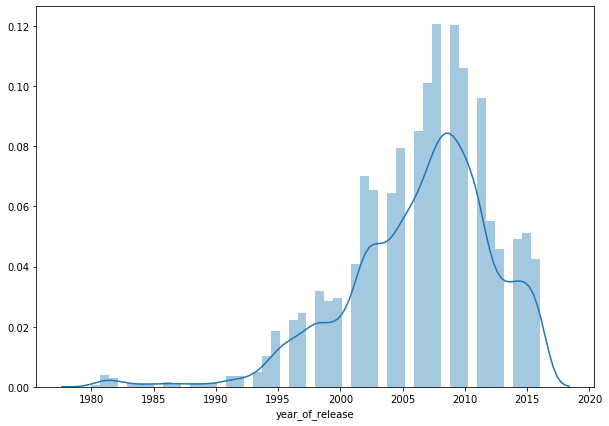

In [25]:
sns.distplot(df['year_of_release'])

Предположим, что можно сконцентироваться на анализе данных по играм начиная с 2000 года, так как большее количество значений сконцентрировано как раз в этом периоде.

In [26]:
df_year = df.pivot_table(index = ['year_of_release'], values = 'name', aggfunc = 'count')

In [27]:
df_year.tail(20)

,name
year_of_release,
1997,289
1998,379
1999,338
2000,350
2001,482
2002,829
2003,775
2004,762
2005,939


Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [28]:
df_platform = df.pivot_table(index = ['platform'], values = 'all_sales', aggfunc = 'sum')
df_platform.sort_values('all_sales', ascending=False).head(20)

,all_sales
platform,
PS2,5961
DS,4422
PS3,3957
X360,3894
PS,3567
Wii,3488
PSP,2168
XB,2016
GBA,1933


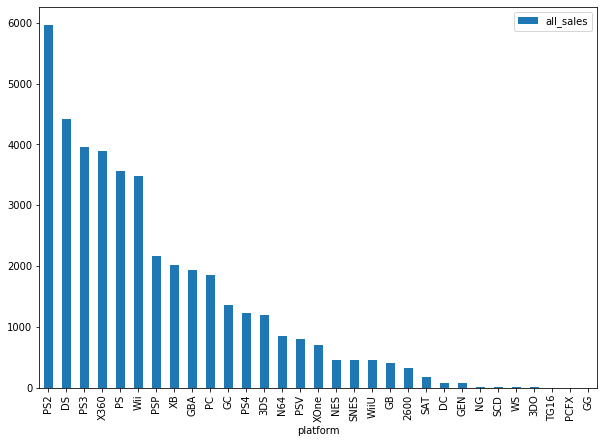

In [29]:
df_platform.sort_values('all_sales', ascending=False).plot(kind='bar')

Определим для себя, что платформы с наибольшим количеством продаж это платформы с значением allsales выше 700. 
В таком случае, как видно из графика и таблицы абсолютный лидер продаж - платнформу PS2, замыкает список 3DS.

In [30]:
df_platform_year = df.pivot_table(index = ['platform'], values = 'year_of_release', aggfunc = 'mean')
df_platform_year.sort_values('year_of_release', ascending=False).head(20)

,year_of_release
platform,
PS4,2015.145408
XOne,2014.951417
PSV,2014.132867
WiiU,2013.659864
3DS,2013.126953
PS3,2010.840735
X360,2009.880682
Wii,2008.966563
PC,2008.914316


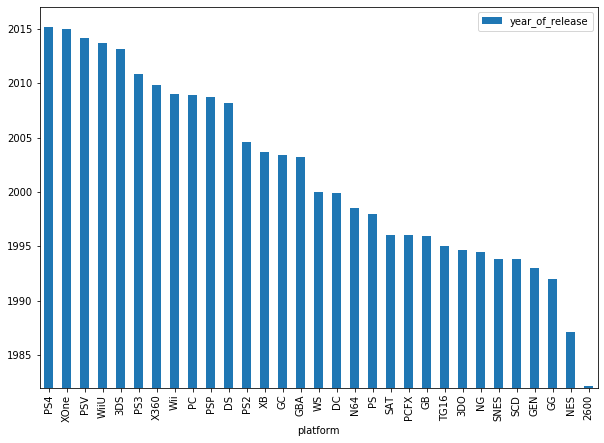

In [31]:
df_platform_year.sort_values('year_of_release', ascending=False).plot(kind='bar')
plt.ylim(1982, 2017)
plt.show()

На графике видно, что половина платформ, представленная в данных к 2000 году уже исчезла. Основываясь на этом сконцентрируемся на периоде начиная  с 2000 года.

In [32]:
# выделяем данные в соответствии с актуальным периодом. Не учитываем данные за предыдущие годы.
good_df = df.query('year_of_release > 2000')

In [33]:
good_platform = good_df.pivot_table(index = ['platform'], values = 'all_sales', aggfunc = 'sum')

In [34]:
# выделяем данные в соответствии объемами продаж,которые определили как приоритетные.
good_platform = good_platform.query('all_sales > 700')

In [35]:
good_platform.head()

,all_sales
platform,
3DS,1203
DS,4421
GBA,1931
GC,1356
PC,1734


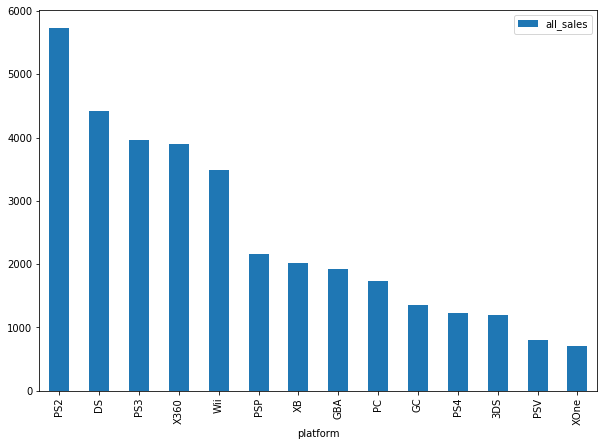

In [36]:
# построим диаграмму с распределением дохода по платформам
good_platform.sort_values('all_sales', ascending=False).plot(kind='bar')

Платформы лидирующие по продажам приведены на графике выше. Это платформы семейств: PS(PS2,PS3) и XBOX(X360) и Nintendo(DS и WII).

In [37]:
#выделим их в отдельный список и построим график продаж по годам
actual = good_df.query('platform == "PS2" or platform == "DS" or platform == "PS3" or platform == "X360" or platform == "Wii"\
and year_of_release > 2000')

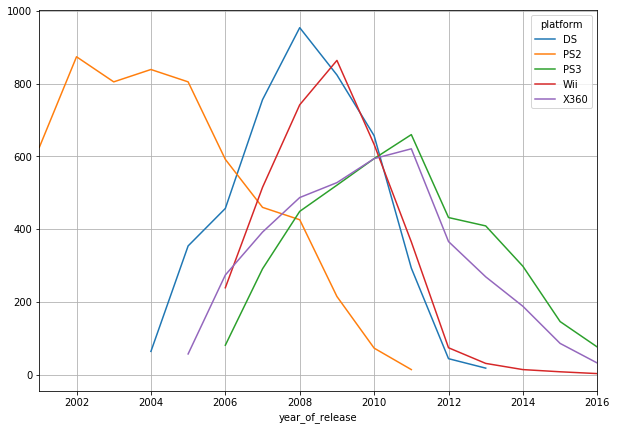

In [38]:
# построим график с динамикой дохода по годам по актуальным платформам
actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum').plot(grid = True)

По всем платформам с наибольшим уровнем дохода произошло падение продаж в период с 2010 по 2016 году, вероятно это связано с обновлением платформ и снижением объемов продаваемых игр в эти годы.

In [39]:
#также проверим оставшуюся часть списка, вдруг мы что-то упустили.
potential = good_df.query('platform == "PSP" or platform == "XB" or platform == "GBA" or platform == "PC" or platform == "GS" \
or platform == "PS4" or platform == "3DS" or platform == "PSV" or platform == "XOne" and year_of_release > 2000')

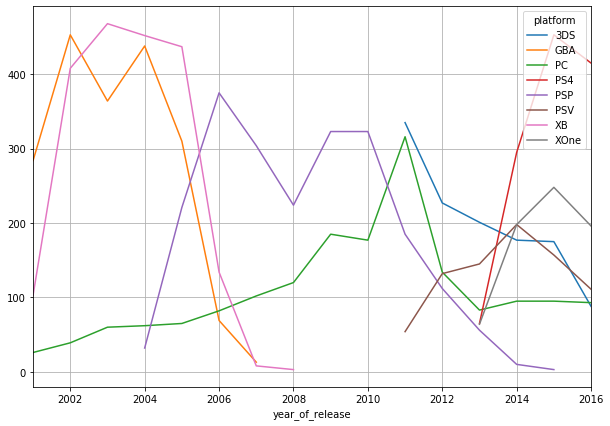

In [40]:
# построим график с динамикой дохода по годам по остальным платформам
potential.pivot_table(index = 'year_of_release', columns = 'platform', values = 'all_sales', aggfunc = 'sum').plot(grid = True)

Наиболее высопотенциальными я бы назвал платформы PS4 и XOne, как видно из графика только по ним мы видим рост доходов в последние годы, они не попадают в список высокодоходных в силу того они новые и игры для них еще не выпускаются столько лет.

Построим график по глобальным продажам каждой игры и разбивкой по платформам.

(0, 30)

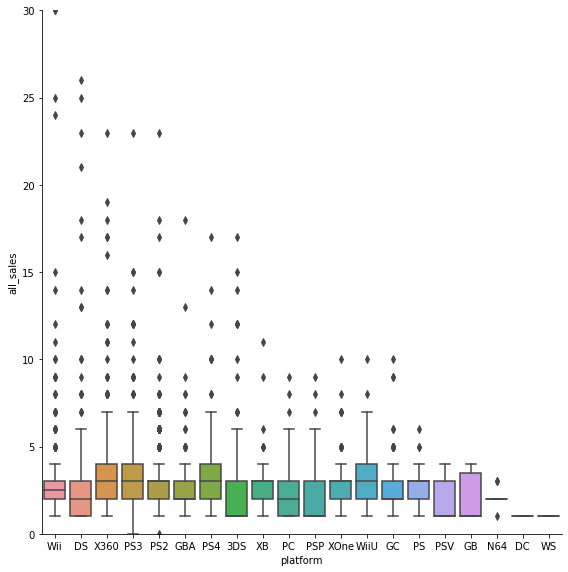

In [41]:
sns.catplot(x='platform', y='all_sales', data = good_df, kind='box', height = 8)
plt.ylim(0, 30)

Проанализировав график, платформы по доходности можно разделить на несколько групп:
1. Высокий доход - Wii, DS, X360, PS3, PS2, GBA, PS4, 3DS
2. Средний доход - XB, PC, PSP, XOne, GC
3. Низкий доход - PS, PSV, GB, N64, DC, WS

При этом высокий доход платформ сформирован похоже за счет отдельных игр-хитов.
Средний доход по платформам не сильно отличается от платформы к платформе.

Посмотрим, как влияют на продажи внутри одной из популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеивания и посчитаем корреляцию между отзывами и продажами. 

In [42]:
#фильтруем по PS3, в new_user_score попадаются значения NaN, отбрасываем их, для анализа такого количества данных будет достаточно.
rating = actual.query('platform == "PS3" and new_user_score != "NaN"')

In [43]:
# приводим к числовым значениям
rating['new_user_score'] = pd.to_numeric(rating['new_user_score'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 16 to 16710
Data columns (total 14 columns):
name                1219 non-null object
platform            1219 non-null object
year_of_release     1219 non-null int64
genre               1219 non-null object
na_sales            1219 non-null int64
eu_sales            1219 non-null int64
jp_sales            1219 non-null int64
other_sales         1219 non-null int64
critic_score        775 non-null float64
user_score          861 non-null object
rating              853 non-null object
new_user_score      1219 non-null float64
new_critic_score    1219 non-null float64
all_sales           1219 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 142.9+ KB


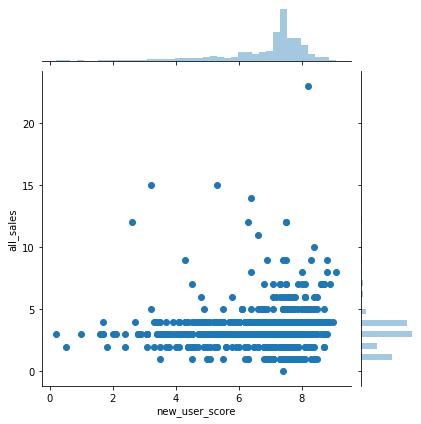

In [45]:
# строим диаграмму рассеивания
sns.jointplot(x='new_user_score', y='all_sales', data = rating)

In [46]:
# считаем корреляцию
print(rating['new_user_score'].corr(rating['all_sales']))

-0.031599183404721926


Большее количество значений сконцентрировано в области с рейтингом 6-8. Можно подтвердить, что высокий рейтинг пользователей имеет связь с объемами продаж, но при этом есть выбросы и по играм с небольшим рейтингом. Коээфициент корреляции отрицательный.

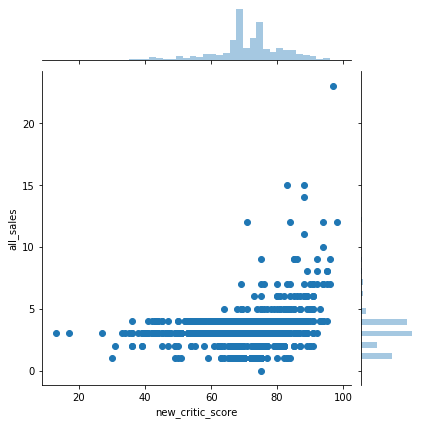

In [47]:
# далее аналогично по критикам
sns.jointplot(x='new_critic_score', y='all_sales', data = rating)

In [48]:
print(rating['new_critic_score'].corr(rating['all_sales']))

0.28324275499544194


Большее количество значений сконцентрировано в области с рейтингом 60-80. Можно подтвердить, что высокий рейтинг критиков имеет связь с объемами продаж. Наибольшие объемы продаж наблюдают у игр с рейтингом 60-100. Ниже 60 редко игры показывают большие результаты. Коээфициент корреляции не высокий.

In [49]:
# далее аналогично по всем платформам
rating_all = good_df.query('new_user_score != "NaN"')

In [50]:
rating_all['new_user_score'] = pd.to_numeric(rating_all['new_user_score'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
rating_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11796 entries, 0 to 16714
Data columns (total 14 columns):
name                11796 non-null object
platform            11796 non-null object
year_of_release     11796 non-null int64
genre               11796 non-null object
na_sales            11796 non-null int64
eu_sales            11796 non-null int64
jp_sales            11796 non-null int64
other_sales         11796 non-null int64
critic_score        6735 non-null float64
user_score          7264 non-null object
rating              7239 non-null object
new_user_score      11796 non-null float64
new_critic_score    11796 non-null float64
all_sales           11796 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.3+ MB


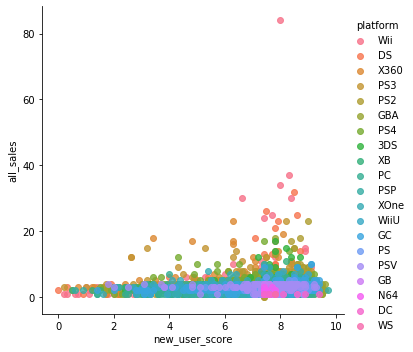

In [52]:
sns.lmplot('new_user_score', 'all_sales', data=rating_all, hue='platform', fit_reg=False);

In [53]:
print(rating_all['new_user_score'].corr(rating_all['all_sales']))

0.02692150645851793


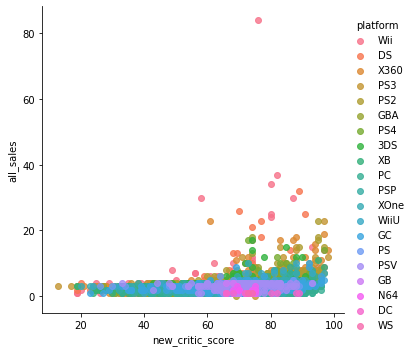

In [54]:
sns.lmplot('new_critic_score', 'all_sales', data=rating_all, hue='platform', fit_reg=False);

In [55]:
print(rating_all['new_critic_score'].corr(rating_all['all_sales']))

0.19010135602625927


Похоже ситуация на других платформах близка c примером платформы PS3. Коэффициенты корреляции невысокие.

Посмотрим на общее распределение игр по жанрам.

In [56]:
# выбираем данные по жанрам
genre = good_df.pivot_table(index = ['genre'], values = 'all_sales', aggfunc = 'sum')

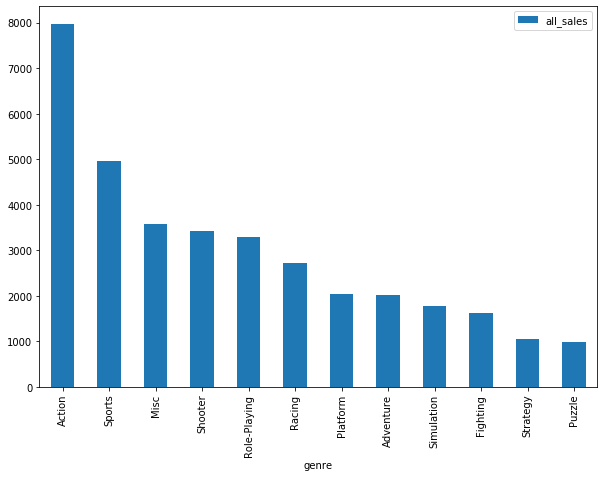

In [57]:
# строим диаграмму по прибыли и жанрам.
genre.sort_values('all_sales', ascending=False).plot(kind='bar')

Можно уверенно сказать, что самый прибыльный жанр это Action. На втором месте Sport. На третьем месте с примерно одинаковым результатот Misk, Shooter, Role-Playing и Racing. Наименнее доходные жанры - это Strategy и Puzzle.

#### Шаг 4. Портрет пользователя каждого региона
Определим для пользователя каждого региона самые популярные платформы, жанры, влияние рейтинга ESRB на продажи

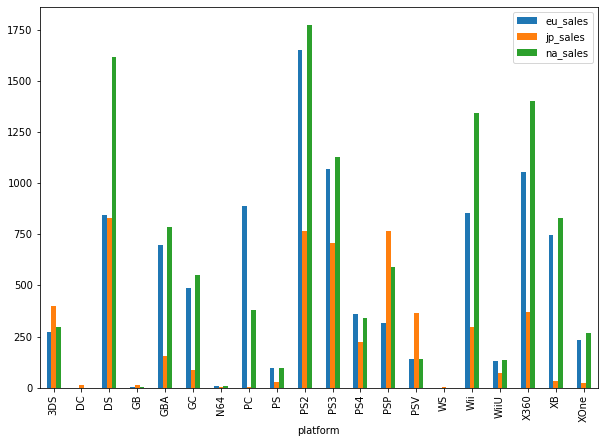

In [58]:
# построим общую диаграмму по всем платформам и прибыли по регионам
region_sales = good_df.pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
region_sales.plot(kind='bar')

#### Продажи в Северной Америке (миллионы долларов)

In [59]:
# выделяем отдельно прибыль по региону в разрезе платформ с подсчетом доли в прибыли.
na = good_df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
na['mean'] = (na['na_sales'] / na['na_sales'].sum() * 100)
na.sort_values('na_sales', ascending=False).head(15)

,na_sales,mean
platform,,
PS2,1772,15.162146
DS,1619,13.852999
X360,1403,12.004792
Wii,1345,11.508514
PS3,1128,9.651750
XB,830,7.101908
GBA,787,6.733978
PSP,590,5.048344
GC,552,4.723197


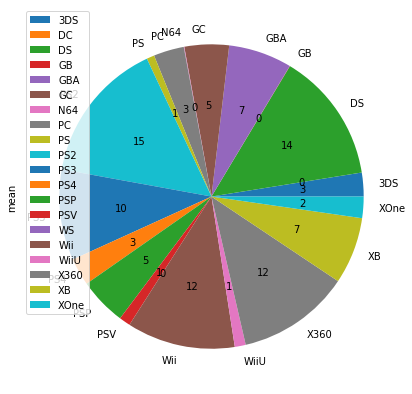

In [60]:
# для наглядности построим круговую диаграмму
na.plot(y='mean', kind='pie', autopct='%.f')

Самые популярные платформы (топ-5) в Северной Америке PS2, DS, X360, Wii и PS3

In [61]:
# тоже самое в разрезе по жанрам.
na_genre = good_df.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
na_genre['mean'] = (na_genre['na_sales'] / na_genre['na_sales'].sum() * 100)
na_genre.sort_values('na_sales', ascending=False).head(15)

,na_sales,mean
genre,,
Action,2558,21.887567
Sports,1759,15.050911
Misc,1245,10.652862
Shooter,1237,10.584410
Racing,985,8.428168
Role-Playing,883,7.555403
Platform,757,6.477282
Simulation,598,5.116796
Adventure,504,4.312484


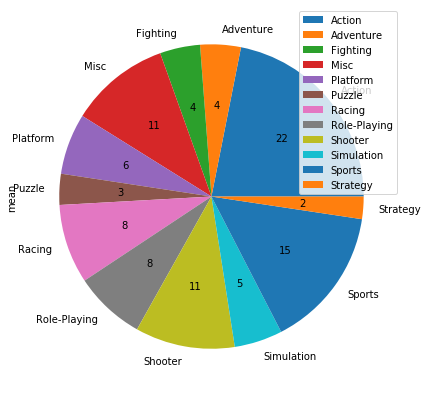

In [62]:
na_genre.plot(y='mean', kind='pie', autopct='%.f')

Самые популярные жанры (топ-5) в Северной Америке Action, Sports, Misc, Shooter, Racing

In [63]:
# аналогично по другим регионам
na_rating = good_df.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
na_rating = na_rating.query('rating != "NaN" & na_sales != 0')
na_rating.sort_values('na_sales', ascending=False).head(10)

,na_sales
rating,
E,4054
T,2688
M,1744
E10+,1387
EC,8
AO,2


#### Классифицикация рейтингов по версии ESRB.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «E» («Everyone») — «Для всех»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «T» («Teen») — «Подросткам
- «M» («Mature») — «Для взрослых»
- AO» («Adults Only 18+») — «Только для взрослых»

Наибольший объем продаж в Северной америке у игр с рейтингом Е, Т, что логично в силу большего охвата аудитории. Меньше продаж по играм с рейтингами : М, E10+

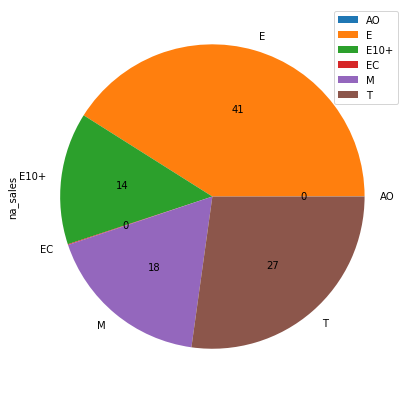

In [64]:
na_rating.plot(y='na_sales', kind='pie', autopct='%.f')

#### Продажи в Европе (миллионы долларов)

In [65]:
eu = good_df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
eu['mean'] = (eu['eu_sales'] / eu['eu_sales'].sum() * 100)
eu.sort_values('eu_sales', ascending=False).head(15)

,eu_sales,mean
platform,,
PS2,1650,16.756372
PS3,1067,10.835788
X360,1054,10.703768
PC,886,8.997664
Wii,852,8.652381
DS,843,8.560983
XB,747,7.586067
GBA,700,7.108764
GC,486,4.935513


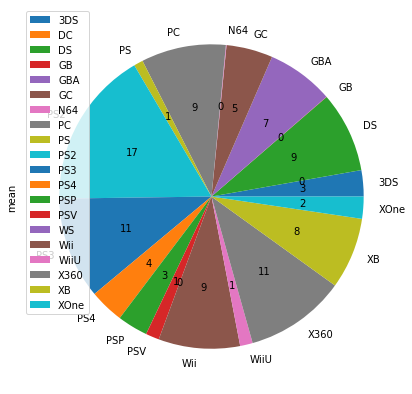

In [66]:
eu.plot(y='mean', kind='pie', autopct='%.f')

Самые популярные платформы (топ-5) в Европе PS2, PS3, X360, PC и Wii

In [67]:
eu_genre = good_df.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
eu_genre['mean'] = (eu_genre['eu_sales'] / eu_genre['eu_sales'].sum() * 100)
eu_genre.sort_values('eu_sales', ascending=False).head(15)

,eu_sales,mean
genre,,
Action,2297,23.326902
Sports,1416,14.380014
Shooter,1042,10.581903
Misc,925,9.393724
Racing,869,8.825023
Role-Playing,747,7.586067
Platform,618,6.276023
Simulation,485,4.925358
Adventure,447,4.539454


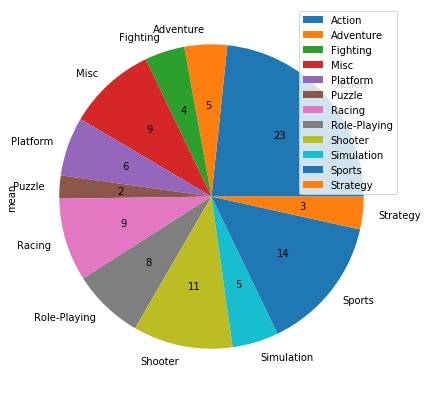

In [68]:
eu_genre.plot(y='mean', kind='pie', autopct='%.f')

Самые популярные жанры (топ-5) в Европе: Action, Sports, Shooter,  Misc, Racing.

In [69]:
eu_rating = good_df.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
eu_rating = eu_rating.query('rating != "NaN" & eu_sales != 0')
eu_rating.sort_values('eu_sales', ascending=False).head(10)

,eu_sales
rating,
E,2992
T,2390
M,1599
E10+,1064
EC,2
AO,1
RP,1


Наибольший объем продаж в Европе у игр с рейтингом Е, Т, что логично в силу большего охвата аудитории. Меньше продаж по играм с рейтингами : М, E10+

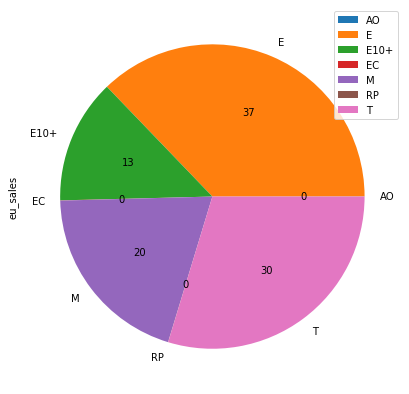

In [70]:
eu_rating.plot(y='eu_sales', kind='pie', autopct='%.f')

#### Продажи в Японии (миллионы долларов)

In [71]:
jp = good_df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
jp['mean'] = (jp['jp_sales'] / jp['jp_sales'].sum() * 100)
jp.sort_values('jp_sales', ascending=False).head(15)

,jp_sales,mean
platform,,
DS,829,16.100214
PSP,768,14.915518
PS2,765,14.857254
PS3,707,13.730822
3DS,401,7.787920
X360,371,7.205283
PSV,365,7.088755
Wii,296,5.748689
PS4,223,4.330938


Самые популярные платформы (топ-5) в Японии: DS, PSP, PS2 ,  PS3, 3DS.

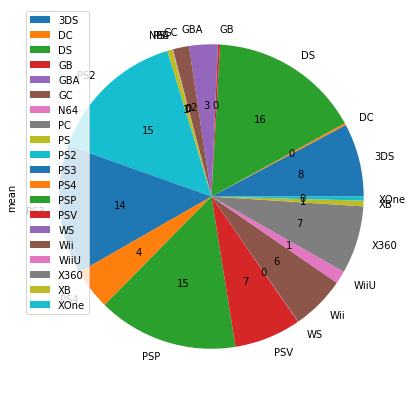

In [72]:
jp.plot(y='mean', kind='pie', autopct='%.f')

In [73]:
jp_genre = good_df.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
jp_genre['mean'] = (jp_genre['jp_sales'] / jp_genre['jp_sales'].sum() * 100)
jp_genre.sort_values('jp_sales', ascending=False).head(15)

,jp_sales,mean
genre,,
Action,1116,21.674111
Role-Playing,960,18.644397
Adventure,678,13.167605
Misc,477,9.263935
Sports,431,8.370557
Fighting,325,6.311905
Shooter,308,5.981744
Simulation,215,4.175568
Strategy,187,3.631773


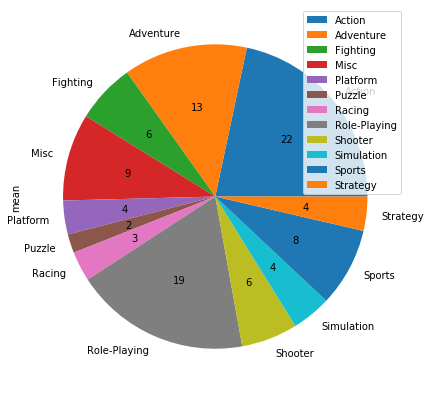

In [74]:
jp_genre.plot(y='mean', kind='pie', autopct='%.f')

Самые популярные жанры (топ-5) в Японии: Action, Role-Playing, Adventure ,  Misc, Sports.

In [75]:
jp_rating = good_df.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
jp_rating = jp_rating.query('rating != "NaN" & jp_sales != 0')
jp_rating.sort_values('jp_sales', ascending=False).head(10)

,jp_sales
rating,
T,817
E,629
M,535
E10+,245


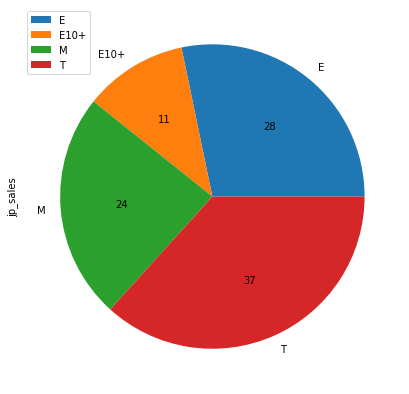

In [76]:
jp_rating.plot(y='jp_sales', kind='pie', autopct='%.f')

Наибольший объем продаж в Японии у игр с рейтингом Т. Меньше продаж по играм с рейтингами : E, М и E10+.

#### Классифицикация рейтингов по версии ESRB.
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «E» («Everyone») — «Для всех»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «T» («Teen») — «Подросткам
- «M» («Mature») — «Для взрослых»
- AO» («Adults Only 18+») — «Только для взрослых»

### Вывод.
Изучив анализ самых популярных платформ и жанров в разных регионах можно сказать, что потребители Северной Америка и Европа схожи в своих вкусах в выборе. В обоих регионах в топ-5 популярных платформ входит PS2, PS3, X360 и Wii, но при этом в Америке популярен DS, а в Европе PC.

Что касается жанров, то тут тоже имеется сходство: Action, Sports, Misc, Shooter, Racing самые попурные жанры в обоих регионах с неболшим отличием в растановке.

В части рейтингов тоже похожая ситуация. Наибольший объем продаж  с рейтингом Е, Т, что логично в силу большего охвата аудитории. Меньше продаж по играм с рейтингами : М, E10+. Единственное в Америке доля продаж с игр с рейтингом E значительно выше остальных. В этих регионах рейтинг определенно влияет на уровень продаж.

Правда говорят, что Япония это отдельный мир, поведение пользователей там отличается по всем критериям.

- Самые популярные платформы (топ-5) в Японии: DS, PSP, PS2 , PS3, 3DS. В Японии в большие продажи среди переностных платформах PSP и 3DS. Такого нет в других регионах.
- Самые популярные жанры (топ-5) в Японии: Action, Role-Playing, Adventure , Misc, Sports. В Японии популярны игры жанр Role-Playing, Adventure в отличие от других регионов.
- Наибольший объем продаж в Японии у игр с рейтингом Т. Меньше продаж по играм с рейтингами : E, М и E10+. Тут тоже своя особенность, похоже подростки, которые как раз предпочитают переностные платформы покупают больше игр и продажи по ним обгоняют даже игры с рейтингом E,которые доступны для всех. Нельзя сказать, что более охватывающий аудиторию рейтинг имеет в Японии такое влияние как в других регионах.

### Шаг 5. Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [77]:
from scipy import stats as st

In [78]:
# создаем необходимый срез данный по платформам и рейтингу пользователей.
alpha= .05
xbox_data = good_df.query('platform == "XOne" and new_user_score != "NaN"')
xbox_data['new_user_score'] = pd.to_numeric(xbox_data['new_user_score'])
xbox_data = xbox_data.loc[xbox_data['platform'] == 'XOne','new_user_score']
pc_data = good_df.query('platform == "PC" and new_user_score != "NaN"')
pc_data['new_user_score'] = pd.to_numeric(pc_data['new_user_score'])
pc_data = pc_data.loc[pc_data['platform'] == 'PC','new_user_score']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [79]:
xbox_data = good_df.query('platform == "XOne" and new_user_score != "NaN"')
xbox_data['new_user_score'] = pd.to_numeric(xbox_data['new_user_score'])
xbox_data = xbox_data.loc[xbox_data['platform'] == 'XOne','new_user_score']
xbox_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


99       7.4
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16597    6.0
16630    8.2
16643    6.6
16645    7.4
16660    6.7
Name: new_user_score, Length: 236, dtype: float64

#### Сформилируем нулевую гипотезу так: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
#### Сформилируем альтернативную гипотезу так : Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [80]:
results = st.ttest_ind(xbox_data,pc_data)

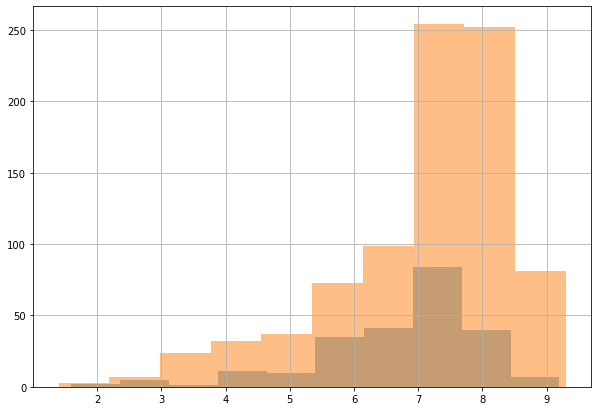

In [81]:
#для наглядности построим двойную гистограмму.
xbox_data.hist(alpha=0.5)
pc_data.hist(alpha=0.5)
plt.show()

In [82]:
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0003041828714408626
Не получилось отвергнуть нулевую гипотезу


#### Сформилируем нулевую гипотезу так: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые;
#### Сформилируем альтернативную гипотезу так : Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [83]:
alpha= .05

action_data = good_df.query('genre == "Action" and new_user_score != "NaN"')
action_data['new_user_score'] = pd.to_numeric(action_data['new_user_score'])
action_data = action_data.loc[action_data['genre'] == 'Action','new_user_score']

sports_data = good_df.query('genre == "Sports" and new_user_score != "NaN"')
sports_data['new_user_score'] = pd.to_numeric(sports_data['new_user_score'])
sports_data = sports_data.loc[sports_data['genre'] == 'Sports','new_user_score']

results= st.ttest_ind(action_data,sports_data)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


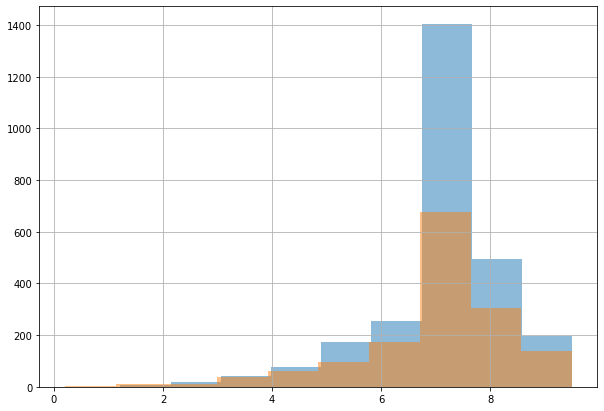

In [84]:
action_data.hist(alpha=0.5)
sports_data.hist(alpha=0.5)
plt.show()

In [85]:
print('p-значение:', results.pvalue)

if (results.pvalue > alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.024515082073785784
Не получилось отвергнуть нулевую гипотезу


Проверены две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ВЕРНА
2. Средние пользовательские рейтинги жанров Action и Sports разные - НЕ ПОДТВЕРДИЛАСЬ.

### Шаг 6. Общий вывод

Проанализировав данные можно определить следующие закономерности успешности игры: 

Платформы лидирующие по продажам согласно историческим данным - это платформы семейств: PS(PS2,PS3) и XBOX(X360) и Nintendo(DS и WII), считаю, что дальнейшем игры платформ этих семейств будут наиболее прибыльны, наиболее высопотенциальными я бы назвал платформы PS4 и XOne.

Можно подтвердить, что высокий рейтинг критиков большую связь с объемами продаж, чем рейтинг пользователей. Наибольшие объемы продаж наблюдают у игр с рейтингом  критиков 60-100 и пользовательским рейтингом 6-8.

Изучив анализ самых популярных платформ и жанров в разных регионах можно сказать, что потребители Северной Америки и Европа схожи в своих вкусах в выборе. В обоих регионах в топ-5 популярных платформ входит PS2, PS3, X360 и Wii, но при этом в Америке популярен DS, а в Европе PC.

Что касается жанров, то тут тоже имеется сходство: Action, Sports, Misc, Shooter, Racing самые попурные жанры в обоих регионах с неболшим отличием в растановке.

В части рейтингов тоже похожая ситуация. Наибольший объем продаж  с рейтингом Е, Т, что логично в силу большего охвата аудитории. Меньше продаж по играм с рейтингами : М, E10+. Единственное в Америке доля продаж с игр с рейтингом E значительно выше остальных. В этих регионах рейтинг определенно влияет на уровень продаж.

Правда говорят, что Япония это отдельный мир, поведение пользователей отличается по всем критериям.

- Самые популярные платформы (топ-5) в Японии: DS, PSP, PS2 , PS3, 3DS. В Японии в большие продажи среди переностных платформах PSP и 3DS. Такого нет в других регионах.
- Самые популярные жанры (топ-5) в Японии: Action, Role-Playing, Adventure , Misc, Sports. В Японии популярны игры жанр Role-Playing, Adventure в отличие от других регионов.
- Наибольший объем продаж в Японии у игр с рейтингом Т. Меньше продаж по играм с рейтингами : E, М и E10+. Тут тоже своя особенность, похоже подростки, которые как раз предпочитают переностные платформы покупают больше игр и продажи по ним обгоняют даже игры с рейтингом E,которые доступны для всех. Нельзя сказать, что более охватывающий аудиторию рейтинг имеет в Японии такое влияние как в других регионах.

Также были проверены две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ВЕРНА
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные- НЕ ПОДТВЕРДИЛАСЬ.

Я считаю целесообразным спланировать рекламную компанию на основе результатов исследования приведенного выше, учитывая спецфику региона и результаты по жанрам и платформам.